In [7]:
#Import libs, read dataset, drop unusefull columns (occasionally occured during parsing of data)

import pandas as pd
import numpy as np

columns=['Sp_nummer', 'Due_date', 'Fc_horizon', 'Fc_date', 'Fc_and_order', 'Billing']
df = pd.read_excel(r'C:\Users\MikhailPetrovBrainer\Documents\Private\SoSe22\Projektseminar\data\q4_2017.xlsx', index_col=None, header=1)
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

# Generall Data Prepatation
1. Inspection
2. Convert strings to integers
3. Convert date to ISO format

In [48]:
#Inspect dataframe

df.head()
# df.info()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing,products
0,Product_19,201813,13,201752,176316,NaN,0
1,Product_20,201813,13,201752,516510,NaN,1
2,Product_22,201813,13,201752,237587,NaN,2
3,Product_30,201813,13,201752,393741,NaN,3
4,Product_39,201813,13,201752,92112,NaN,4


In [248]:
#Remove NaN

df['Billing'].loc[df['Billing'].isna()] = 0
df['Fc_and_order'].loc[df['Fc_and_order'].isna()] = 0
df.head()

<ipython-input-248-d2a65cc15a89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Billing'].loc[df['Billing'].isna()] = 0
<ipython-input-248-d2a65cc15a89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fc_and_order'].loc[df['Fc_and_order'].isna()] = 0


,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing,products,year,week,date,ddate,year_,week_,fdate
0,Product_19,201813,13,201752,176316,0.0,0,2018,13,2018-03-26,2018-03-26,2017,52,2017-12-25
1,Product_20,201813,13,201752,516510,0.0,1,2018,13,2018-03-26,2018-03-26,2017,52,2017-12-25
2,Product_22,201813,13,201752,237587,0.0,2,2018,13,2018-03-26,2018-03-26,2017,52,2017-12-25
3,Product_30,201813,13,201752,393741,0.0,3,2018,13,2018-03-26,2018-03-26,2017,52,2017-12-25
4,Product_39,201813,13,201752,92112,0.0,4,2018,13,2018-03-26,2018-03-26,2017,52,2017-12-25


In [25]:
#Save products. Create converter from product as string to product as integer and reverse

products = df['Sp_number'].unique()
prod2idx = {}
idx2prod = {}
for idx, prod in enumerate(products):
    if prod not in prod2idx:
        prod2idx[prod] = idx
        idx2prod[idx] = prod

In [32]:
#Add column with integer product names

products_int = []
for idx, row in df['Sp_number'].iteritems():
    products_int.append(prod2idx[row])
    
df['products'] = products_int

In [66]:
#Convert dates (Due date and Fc date) from YearWeek-format to iso format YYYY-MM-DD

years = []
weeks = []
for i,r in df['Due_date'].items():
    years.append(str(r)[:4])
    weeks.append(str(r)[4:])

In [90]:
df['year'] = years
df['week'] = weeks
df['year'] = df['year'].astype(int)
df['week'] = df['week'].astype(int)
idx4drop = df.loc[df['week']>52].index
df.drop(idx4drop, inplace=True)

In [93]:
df['ddate'] = df[['year', 'week']].apply(lambda x: date.fromisocalendar(x['year'], x['week'], 1), axis=1)

In [95]:
years = []
weeks = []
for i,r in df['Fc_date'].items():
    years.append(str(r)[:4])
    weeks.append(str(r)[4:])

In [96]:
df['year_'] = years
df['week_'] = weeks
df['year_'] = df['year_'].astype(int)
df['week_'] = df['week_'].astype(int)
idx4drop = df.loc[df['week_']>52].index
df.drop(idx4drop, inplace=True)

In [98]:
df['fdate'] = df[['year_', 'week_']].apply(lambda x: date.fromisocalendar(x['year_'], x['week_'], 1), axis=1)

In [99]:
df.head()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing,products,year,week,date,ddate,year_,week_,fdate
0,Product_19,201813,13,201752,176316,NaN,0,2018,13,2018-03-26,2018-03-26,2017,52,2017-12-25
1,Product_20,201813,13,201752,516510,NaN,1,2018,13,2018-03-26,2018-03-26,2017,52,2017-12-25
2,Product_22,201813,13,201752,237587,NaN,2,2018,13,2018-03-26,2018-03-26,2017,52,2017-12-25
3,Product_30,201813,13,201752,393741,NaN,3,2018,13,2018-03-26,2018-03-26,2017,52,2017-12-25
4,Product_39,201813,13,201752,92112,NaN,4,2018,13,2018-03-26,2018-03-26,2017,52,2017-12-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27059,Product_67,201401,5,201348,543052,530000.0,9,2014,1,2013-12-30,2013-12-30,2013,48,2013-11-25
27060,Product_67,201401,4,201349,563778,530000.0,9,2014,1,2013-12-30,2013-12-30,2013,49,2013-12-02
27061,Product_67,201401,3,201350,503575,530000.0,9,2014,1,2013-12-30,2013-12-30,2013,50,2013-12-09
27062,Product_67,201401,2,201351,489937,530000.0,9,2014,1,2013-12-30,2013-12-30,2013,51,2013-12-16


In [105]:
#Test: fdate minus ddate is equal to Fc horizon

test = df.iloc[1]
test['ddate'] - test['fdate']
#datetime.timedelta(days=91) == 13 weeks 

datetime.timedelta(days=91)

# Descriptive Statistics

## Forcast, Billings and Error for Product_19

In [495]:
#Might be usefull
import datetime as dt
# 
for idx, test in hor1.iterrows():
    print(test['fdate'] + dt.timedelta(weeks=int(test['Fc_horizon'])) == test['ddate'])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [496]:
#Might be usefull
t = np.arange(dt.datetime(2013,12,23), dt.datetime(2018,12,25), dt.timedelta(days=7)).astype(dt.datetime)

In [499]:
#Poduct with index 0 and billings starting from 2016

df_ = df[['product', 'fdate', 'ddate', 'horizon', 'forecast', 'billing']]
df_0 = df_.loc[(df_['product'] == 0) & (df_['ddate'] > dt.date(2016,1,1))]

In [502]:
#Rewrite dataset: dictionary with key equals to Fc_horizon and value is equal to a tulpe (forecast, billing, error, date)
#Error = billing - forecast for the due_date XXXX

idx2date = {}

for i,r in df_0[['ddate', 'horizon', 'forecast', 'billing']].iterrows():
    horizon = r['horizon']
    if horizon not in idx2date:
        idx2date[horizon] = []
    forecast = r['forecast']
    billing = r['billing']
    date = r['ddate']
    error = billing - forecast
    idx2date[horizon].append((forecast, billing, error, date))

In [503]:
#Prepare data for drawing billings-line

df_duplicates = df_0.loc[df_0.duplicated(subset=['ddate','billing'])]
df_0_ = df_0.drop(df_duplicates.index)
x = df_0_['ddate'].values
y = df_0_['billing'].values

Text(0.5, 1.0, 'Billings and Forecasting Error for Fc_Horizon [12] from the year 2016')

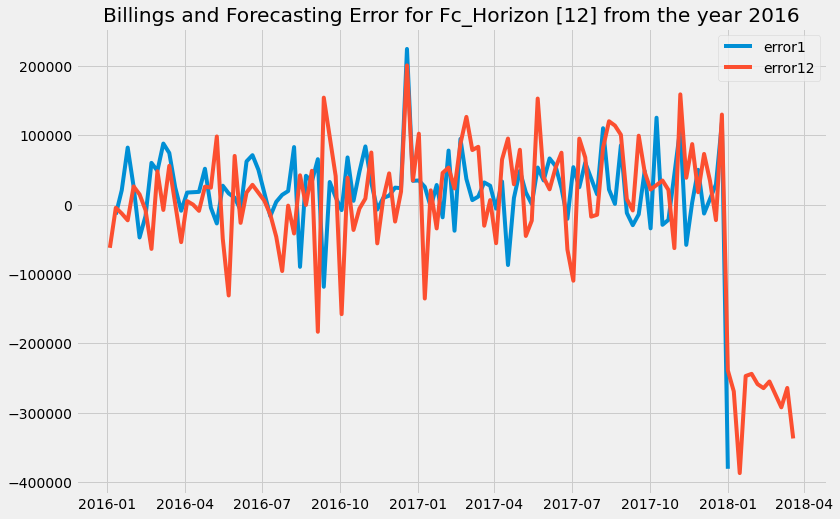

In [512]:
#Create a chart with 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(x,y, label='Billing')
horizon = np.arange(1,2)
for idx in horizon:
    x = [date for (forecast, billing, error, date) in idx2date[idx]] 
#     y = [forecast for (forecast, billing, error, date) in idx2date[idx+1]]
    ye = [error for (forecast, billing, error, date) in idx2date[idx]]
#     ax.plot(x,y, label=('horizon'+str(idx+1)))
    ax.plot(x,ye, label=('error'+str(idx)))
    
horizon = np.arange(12,13)
for idx in horizon:
    x = [date for (forecast, billing, error, date) in idx2date[idx]] 
#     y = [forecast for (forecast, billing, error, date) in idx2date[idx+1]]
    ye = [error for (forecast, billing, error, date) in idx2date[idx]]
#     ax.plot(x,y, label=('horizon'+str(idx+1)))
    ax.plot(x,ye, label=('error'+str(idx)))

ax.legend()
plt.title(f'Billings and Forecasting Error for Fc_Horizon {horizon} from the year 2016')

{'whiskers': [<matplotlib.lines.Line2D at 0x289c7f764f0>,
 'caps': [<matplotlib.lines.Line2D at 0x289c7f76550>,
 'boxes': [<matplotlib.lines.Line2D at 0x289ca8393a0>],
 'medians': [<matplotlib.lines.Line2D at 0x289c7ebcdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x289c7ebc220>],
 'means': []}

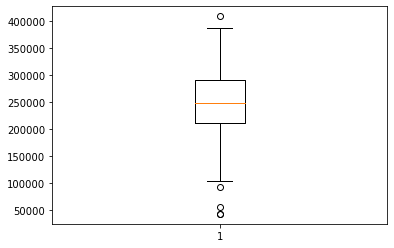

In [316]:
billings_boxplot = df_0_['Billing'].loc[df_0_['Billing']!=0].values
plt.boxplot(billings_boxplot)

In [317]:
df_0_['Billing'].loc[df_0_['Billing']!=0].describe()

count       104.000000
mean     244331.759615
std       72380.860703
min       43000.000000
25%      212000.000000
50%      247500.000000
75%      290750.000000
max      409000.000000
Name: Billing, dtype: float64

In [319]:
df['error'] = df['Billing'] - df['Fc_and_order']
df['error']

0       -176316.0
1       -516510.0
2       -237587.0
3       -393741.0
4        -92112.0
           ...   
27059    -13052.0
27060    -33778.0
27061     26425.0
27062     40063.0
27063     40891.0
Name: error, Length: 26804, dtype: float64

## Overview
1. Remove duplicates for subset products, ddate and billings
2. Aggregate by ddate
3. Remove zeros by billings (zero <=> future period)
4. Extract general statistics
5. Create box-plot and define outliers (on which date we got an outlier)
6. Chart billings to date

In [484]:
mapper = {
    'products': 'product',
    'Fc_horizon': 'horizon',
    'Fc_and_order': 'forecast',
    'Billing': 'billing'
}

In [485]:
df.rename(columns=mapper, inplace=True)

In [486]:
df_ = df[['product', 'billing', 'ddate']].copy()

In [487]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26804 entries, 0 to 27063
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  26804 non-null  int64  
 1   billing  26804 non-null  float64
 2   ddate    26804 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ MB


In [488]:
df_duplicated = df.loc[df_.duplicated(subset=['product', 'ddate', 'billing'])]
df_.drop(df_duplicated.index, inplace=True)
df_.drop(df_.loc[df_['billing']==0].index, inplace=True)

In [490]:
df_

,product,billing,ddate
810,0,301000.0,2017-12-25
822,1,904000.0,2017-12-25
834,2,210000.0,2017-12-25
846,3,357500.0,2017-12-25
858,4,157500.0,2017-12-25
...,...,...,...
26999,5,747500.0,2013-12-30
27012,6,92500.0,2013-12-30
27025,7,207500.0,2013-12-30
27038,8,210000.0,2013-12-30


In [492]:
df_by_date = df_.groupby(['ddate'], as_index=False).sum()
df_by_date

,ddate,product,billing
0,2013-12-30,42,3019500.0
1,2014-01-06,42,3214497.0
2,2014-01-13,45,3489500.0
3,2014-01-20,45,3000000.0
4,2014-01-27,45,3378500.0
...,...,...,...
203,2017-11-27,45,5334000.0
204,2017-12-04,45,6894500.0
205,2017-12-11,45,5742000.0
206,2017-12-18,45,6112500.0


In [436]:
statistics = df_by_date['billing'].describe()

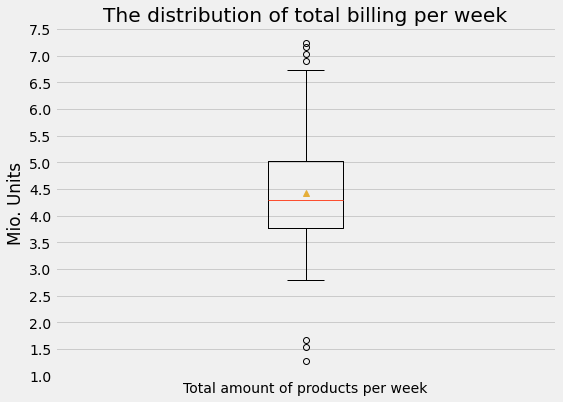

In [443]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
fig.set_size_inches(8,6)

plt.title('The distribution of total billing per week')

plt.xticks(ticks=[], labels=['Total amount of products per week'])
yticks = np.arange(round(df_by_date['billing'].min(),-6), round(df_by_date['billing'].max(), -5)+500000, 500000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]
plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel('Mio. Units')
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.boxplot(df_by_date['billing'], showmeans=True)

plt.savefig('box_general.png')
plt.show()

In [445]:
statistics['75%']
###CALCULATE OUTLIERS

5017750.0

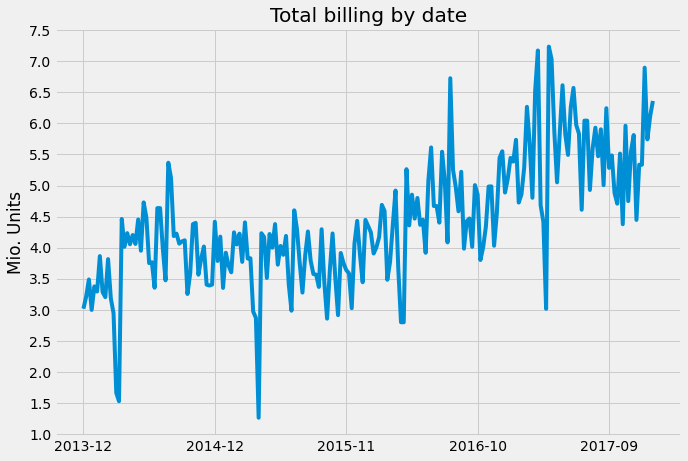

In [465]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

plt.title('Total billing by date')
xticks = np.arange(df_by_date['ddate'].min(), df_by_date['ddate'].max(), dt.timedelta(days=336)).astype(dt.datetime)
plt.xticks(ticks=xticks, labels=[dt.datetime.strftime(x, '%Y-%m') for x in xticks])
yticks = np.arange(round(df_by_date['billing'].min(),-6), round(df_by_date['billing'].max(), -5)+500000, 500000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]
plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel('Mio. Units')
plt.plot(df_by_date['ddate'], df_by_date['billing'])

plt.savefig('line_general.png')
plt.show()

#### Total billing statistics for each year
- Previous dataset
- Split by year
- Create boxplots and line charts


In [467]:
df_by_date.loc[df_by_date['ddate'] > dt.date(2017,1,1)]

,ddate,product,billing
156,2017-01-02,45,5385000.0
157,2017-01-09,45,5735000.0
158,2017-01-16,45,4726500.0
159,2017-01-23,45,4859000.0
160,2017-01-30,45,5289500.0
161,2017-02-06,45,6265500.0
162,2017-02-13,45,5677500.0
163,2017-02-20,45,4803000.0
164,2017-02-27,45,6522000.0
165,2017-03-06,45,7171000.0


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26804 entries, 0 to 27063
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sp_number  26804 non-null  object 
 1   Due_date   26804 non-null  int64  
 2   horizon    26804 non-null  int64  
 3   Fc_date    26804 non-null  int64  
 4   forecast   26804 non-null  int64  
 5   billing    26804 non-null  float64
 6   product    26804 non-null  int64  
 7   year       26804 non-null  int32  
 8   week       26804 non-null  int32  
 9   date       26804 non-null  object 
 10  ddate      26804 non-null  object 
 11  year_      26804 non-null  int32  
 12  week_      26804 non-null  int32  
 13  fdate      26804 non-null  object 
 14  error      26804 non-null  float64
dtypes: float64(2), int32(4), int64(5), object(4)
memory usage: 3.9+ MB


Text(0.5, 1.0, '2014')

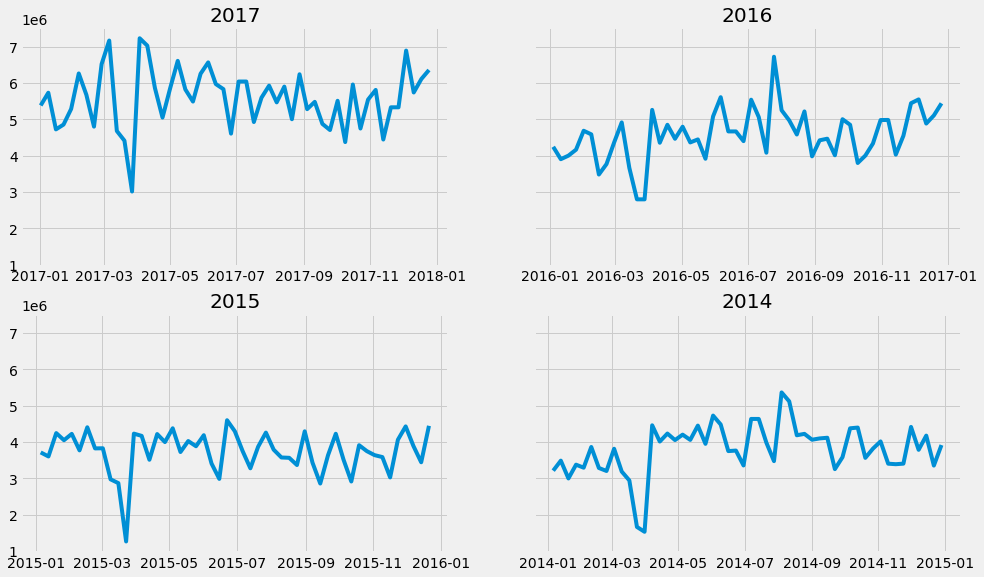

In [483]:
fig, ax = plt.subplots(2,2, sharey=True)
# fig = plt.figure()
# gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
# (ax[0,0], ax[0,1]), (ax[1,0], ax[1,1]) = gs.subplots(sharey='row')
fig.set_size_inches(15,9)
yticks = np.arange(round(df_by_date['billing'].min(),-6), round(df_by_date['billing'].max(), -5)+500000, 500000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]

df00 = df_by_date.loc[df_by_date['ddate'] > dt.date(2017,1,1)]
ax[0,0].plot(df00['ddate'], df00['billing'])
ax[0,0].set_title('2017')

df01 = df_by_date.loc[(df_by_date['ddate'] < dt.date(2017,1,1))&(df_by_date['ddate'] > dt.date(2016,1,1))]
ax[0,1].plot(df01['ddate'], df01['billing'])
ax[0,1].set_title('2016')

df10 = df_by_date.loc[(df_by_date['ddate'] < dt.date(2016,1,1))&(df_by_date['ddate'] > dt.date(2015,1,1))]
ax[1,0].plot(df10['ddate'], df10['billing'])
ax[1,0].set_title('2015')

df11 = df_by_date.loc[(df_by_date['ddate'] < dt.date(2015,1,1))&(df_by_date['ddate'] > dt.date(2014,1,1))]
ax[1,1].plot(df11['ddate'], df11['billing'])
ax[1,1].set_title('2014')

# for a in ax.flat:
#     a.set()